In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
STARTING_STATE = 3
LEFT_TERMINAL_STATE = 0
RIGHT_TERMINAL_STATE = 6
TERMINAL_STATES = [LEFT_TERMINAL_STATE, RIGHT_TERMINAL_STATE]
TOTAL_STATES = 7
ACTIONS = [-1, 1]
STATES = np.array(["A", "B", "C", "D", "E"])

In [26]:
def generate_episode():
    trajectory = []
    state = STARTING_STATE
    trajectory.append(state)
    rewards = []
    while True:
        state += ACTIONS[np.random.randint(2)]
        trajectory.append(state)
        if state in TERMINAL_STATES:
            if state == RIGHT_TERMINAL_STATE:
                rewards.append(1)
            else:
                rewards.append(0)
            break
        rewards.append(0)    
    return trajectory, rewards

In [28]:
trajectory, rewards = generate_episode()
print(trajectory)
print(rewards)

[3, 2, 3, 4, 5, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 6]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [61]:
def TD(v, trajectory, rewards, alpha = 0.1):
    for i in range(1, len(trajectory)):
        v[trajectory[i-1]] += alpha * (v[trajectory[i]] - v[trajectory[i-1]])    

In [110]:
def MC(v, trajectory, rewards, alpha = 0.1):
    return_ = np.sum(rewards)
    for s in trajectory:
        v[s] += alpha * (return_ - v[s])

In [96]:
def generate_figure_1():
    v = np.zeros((TOTAL_STATES)) + 0.5
    v[0] = 0
    v[-1] = 1
    
    true_v = np.zeros(TOTAL_STATES)
    true_v[1:6] = np.arange(1, TOTAL_STATES-1) / (TOTAL_STATES-1)
    true_v[-1] = 1

    num_episodes = [0, 1, 10, 100]
    fig = plt.figure()
    for i in range(num_episodes[-1]+1):
        if i in num_episodes:
            plt.plot(range(1, 6), v[1:-1], label=str(i) + ' episodes', marker = ".")
        trajectory, rewards = generate_episode()
        TD(v, trajectory, rewards)    
    plt.plot(range(1, 6), true_v[1:-1], label="True Value Function", marker = ".")
    
    plt.xlabel('State')
    plt.ylabel('Expected Return')
    plt.ylim(0, 1.0)
    plt.xticks(range(1, 6), STATES)
    plt.legend()
    plt.show()
    plt.close("all")
    

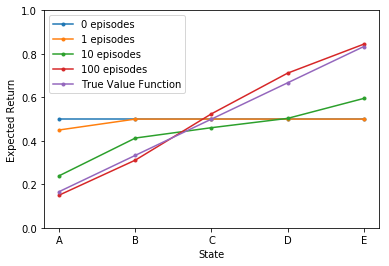

In [101]:
generate_figure_1()

In [143]:
def compute_method(method, alphas, linestyle, runs = 100, num_episodes = 100):
    evaluator = TD if method == "TD" else MC
    
    true_v = np.zeros(TOTAL_STATES)
    true_v[1:6] = np.arange(1, TOTAL_STATES-1) / (TOTAL_STATES-1)
    true_v[-1] = 1
    
    for alpha in alphas:
        total_error = []
        for i in range(runs):
            errors = []
            v = np.zeros((TOTAL_STATES)) + 0.5
            v[0] = 0
            v[-1] = 1
            for j in range(num_episodes):
                trajectory, rewards = generate_episode()
                error = np.sqrt(np.sum(np.power(true_v - v, 2)) / 5.0)
                errors.append(error)
                evaluator(v, trajectory, rewards, alpha=alpha)
            total_error.append(errors)
        total_error = np.mean(total_error, axis=0)
        plt.plot(total_error, linestyle=linestyle, label=method + ', alpha: ' + str(alpha))

In [145]:
def generate_figure_2():
    td_alphas = [0.15, 0.1, 0.05]
    mc_alphas = [0.01, 0.02, 0.03, 0.04]
    fig = plt.figure()
    compute_method("TD", td_alphas, "-")    
    compute_method("MC", mc_alphas, "--")
    plt.xlabel('episodes')
    plt.ylabel('RMS')
    plt.legend()

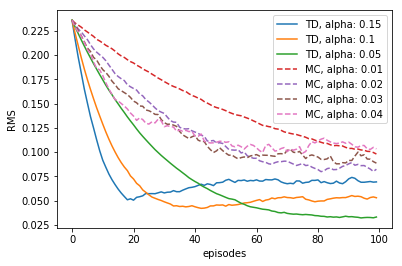

In [146]:
generate_figure_2()